In [2]:
import os # Dizin işlemleri
import cv2 
import numpy as np #image'i array'e dönüştürme
from PIL import Image, UnidentifiedImageError #Veri Temizliği
from sklearn.model_selection import train_test_split #
import tensorflow as tf
from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
path = os.getcwd() + "/Animals/"
folderNames = os.listdir(path)
XSample, ySample = [], []

dog = len(os.listdir(path+"/cane"))
cat = len(os.listdir(path+"/gatto"))
print(f"""
Datasetteki kedi sayısı : {cat}
Datasetteki köpek sayısı : {dog}
""")


Datasetteki kedi sayısı : 1668
Datasetteki köpek sayısı : 4863



In [4]:
#Data Temizleme
def remove_icc_profile(image_path):
    try:
        with Image.open(image_path) as img:
            if "icc_profile" in img.info:
                img.info.pop("icc_profile")
            img.save(image_path)
    except UnidentifiedImageError:
        print(f"Tanımlanamayan resim: {image_path}")
        return False
    return True

for i, folderName in enumerate(folderNames):
    folderPath = os.path.join(path, folderName)
    if os.path.isdir(folderPath):
        for j, file in enumerate([f for f in os.listdir(folderPath)
                                  if os.path.isfile(os.path.join(folderPath, f)) and f != ".DS_Store"]):
            filePath = os.path.join(folderPath, file)
            if remove_icc_profile(filePath):
                img = cv2.imread(filePath)
                
            img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_LINEAR) / 255.0
            XSample.append(np.asarray(img))
            ySample.append(i - 1)                

XSample = np.array(XSample)
ySample = np.array(ySample)
print(XSample.shape)
print(ySample.shape)

Tanımlanamayan resim: /Users/snrbsk/Desktop/Projects/ML-DS-Projects/btk-manisa-yapayZeka/sunum/Animals/gatto/ea37b60c2ffc043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
(6531, 128, 128, 3)
(6531,)


(7836, 128, 128, 3)
(2613, 128, 128, 3)
(2612, 128, 128, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,675,458 (29.28 MB)

 Trainable params: 7,675,330 (29.28 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.6448 - loss: 0.7213 - val_accuracy: 0.2768 - val_loss: 1.8437
Epoch 2/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.7542 - loss: 0.5291 - val_accuracy: 0.4514 - val_loss: 1.0140
Epoch 3/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.7786 - loss: 0.4715 - val_accuracy: 0.7691 - val_loss: 0.4767
Epoch 4/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.8154 - loss: 0.3950 - val_accuracy: 0.8158 - val_loss: 0.4244
Epoch 5/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.8457 - loss: 0.3548 - val_accuracy: 0.7810 - val_loss: 0.4828
Epoch 6/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.8832 - loss: 0.2884 - val_accuracy: 0.8312 - val_loss: 0.4561
Epoch 7/7
245/245 ━━━━━━━━━━━━━━━━━━━━ 693s 3s/step - accuracy: 0.8963 - loss: 0.2491 - val_accuracy: 0.8538 - val_loss: 0.3693
82/82 ━━━━━━━━━━━━━━━━━━━━ 64s 776ms/step
              precision    recall  f1-score   support

       

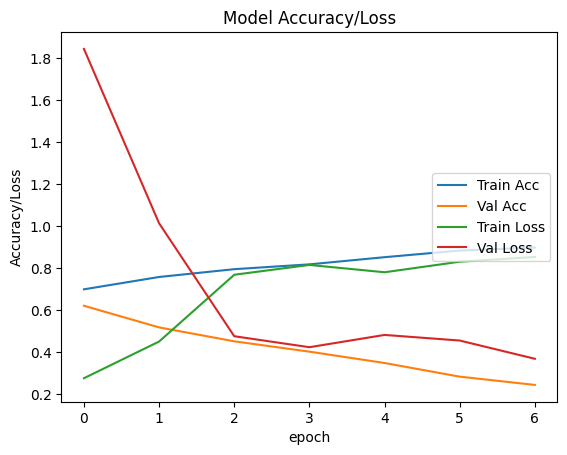

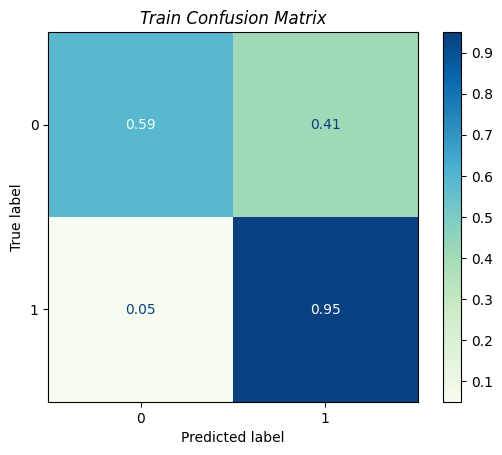

In [20]:
#Split işlemi
XTrain,XTest,yTrain,yTest = train_test_split(XSample,ySample,test_size=0.2,random_state=0)
XTrain,XVal,yTrain,yVal = train_test_split(XTrain,yTrain,test_size=0.25,random_state=0)
print(XTrain.shape)
print(XTest.shape)
print(XVal.shape)

model = models.Sequential()

#Giriş Katmanı
model.add(layers.Conv2D(256,(3,3), activation="relu", input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

#Hidden Layer(s)
model.add(layers.Conv2D(128,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

#Vektöre dönüştürme
model.add(layers.Flatten())

#Dense: Özellikler soyutlaştırılır, bir nevi öğrenme buradadır.
model.add(layers.Dense(64, activation= "relu"))

#Verinin normalizasyonu: Daha hızlı ve daha stabil öğrenme
model.add(layers.BatchNormalization())

#Öğrenme sürecinde random hücre kapatarak overfitting'i engeller
model.add(layers.Dropout(0.2))

#Çıkış Katmanı
model.add(layers.Dense(2, activation="softmax"))

#Model Özeti
model.summary()

#adam yerine rmsprop? #SparseCategoricalCrossentropy yerine Binary(çıkış katmanı 1)
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
history = model.fit(XTrain, yTrain, epochs=7, validation_data=(XVal,yVal))

#Visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'], loc='center right')


#Sıcaklık Haritası
yTestPred = model.predict(XTest)
yTestPred = np.argmax(yTestPred, axis=1)
yTest = np.asarray(yTest)
print(classification_report(yTest, yTestPred))
cm = confusion_matrix(yTest, yTestPred, normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format='g')
plt.title(f"Train Confusion Matrix", style='italic')
plt.show()

(1306, 128, 128, 3)
(1305, 128, 128, 3)
(1307, 128, 128, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,675,458 (29.28 MB)

 Trainable params: 7,675,330 (29.28 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5874 - loss: 0.7718 - val_accuracy: 0.5976 - val_loss: 0.7084
Epoch 2/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6885 - loss: 0.6132 - val_accuracy: 0.7659 - val_loss: 0.6197
Epoch 3/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7204 - loss: 0.5679 - val_accuracy: 0.7590 - val_loss: 0.5971
Epoch 4/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7452 - loss: 0.5501 - val_accuracy: 0.5272 - val_loss: 0.7700
Epoch 5/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7386 - loss: 0.5512 - val_accuracy: 0.7575 - val_loss: 0.7084
Epoch 6/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7277 - loss: 0.5224 - val_accuracy: 0.7628 - val_loss: 0.5529
Epoch 7/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7625 - loss: 0.4961 - val_accuracy: 0.7705 - val_loss: 0.5533
Epoch 8/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8199 - loss: 0.4180 - val_accuracy: 0.7682 - val_loss:

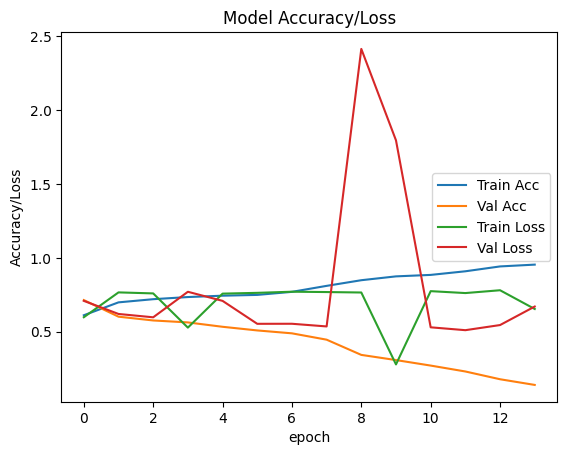

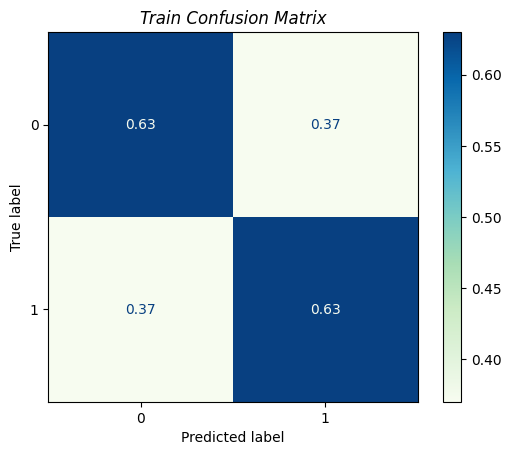

In [8]:
#Split işlemi
XSample_half, _, ySample_half, _ = train_test_split(XSample, ySample, test_size=0.4, random_state=0)
XTrain,XTest,yTrain,yTest = train_test_split(XSample_half,ySample_half,test_size=0.333,random_state=0)
XTrain,XVal,yTrain,yVal = train_test_split(XTrain,yTrain,test_size=0.5,random_state=0)
print(XTrain.shape)
print(XTest.shape)
print(XVal.shape)

model = models.Sequential()

#Giriş Katmanı
model.add(layers.Conv2D(256,(3,3), activation="relu", input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

#Dense: Özellikler soyutlaştırılır, bir nevi öğrenme buradadır.
model.add(layers.Dense(64, activation= "relu"))

#Verinin normalizasyonu: Daha hızlı ve daha stabil öğrenme
model.add(layers.BatchNormalization())

#Öğrenme sürecinde random hücre kapatarak overfitting'i engeller
model.add(layers.Dropout(0.2))

#Çıkış Katmanı
model.add(layers.Dense(2, activation="softmax"))

#Model Özeti
model.summary()

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
history = model.fit(XTrain, yTrain, epochs=14, validation_data=(XVal,yVal))

#Visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'], loc='center right')


#Sıcaklık Haritası
yTestPred = model.predict(XTest)
yTestPred = np.argmax(yTestPred, axis=1)
yTest = np.asarray(yTest)
print(classification_report(yTest, yTestPred))
cm = confusion_matrix(yTest, yTestPred, normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format='g')
plt.title(f"Train Confusion Matrix", style='italic')
plt.show()

In [12]:
#Split işlemi
XSample_half, _, ySample_half, _ = train_test_split(XSample, ySample, test_size=0.4, random_state=0)
XTrain,XTest,yTrain,yTest = train_test_split(XSample_half,ySample_half,test_size=0.333,random_state=0)
XTrain,XVal,yTrain,yVal = train_test_split(XTrain,yTrain,test_size=0.5,random_state=0)
print(XTrain.shape)
print(XTest.shape)
print(XVal.shape)

model = models.Sequential()

#Giriş Katmanı
model.add(layers.Conv2D(256,(3,3), activation="relu", input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

#Dense: Özellikler soyutlaştırılır, bir nevi öğrenme buradadır.
model.add(layers.Dense(64, activation= "relu"))

#Verinin normalizasyonu: Daha hızlı ve daha stabil öğrenme
model.add(layers.BatchNormalization())

#Öğrenme sürecinde random hücre kapatarak overfitting'i engeller
model.add(layers.Dropout(0.2))

#Çıkış Katmanı
model.add(layers.Dense(1, activation="softmax"))

#Model Özeti
model.summary()

model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])
history = model.fit(XTrain, yTrain, epochs=14, validation_data=(XVal,yVal))

#Visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'], loc='center right')


#Sıcaklık Haritası
yTestPred = model.predict(XTest)
yTestPred = np.argmax(yTestPred, axis=1)
yTest = np.asarray(yTest)
print(classification_report(yTest, yTestPred))
cm = confusion_matrix(yTest, yTestPred, normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format='g')
plt.title(f"Train Confusion Matrix", style='italic')
plt.show() 



### Çok daha başarısız overfitting var

(1306, 128, 128, 3)
(1305, 128, 128, 3)
(1307, 128, 128, 3)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,675,393 (29.28 MB)

 Trainable params: 7,675,265 (29.28 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/14


/Users/snrbsk/Desktop/Projects/ML-DS-Projects/btk-manisa-yapayZeka/ven/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/Users/snrbsk/Desktop/Projects/ML-DS-Projects/btk-manisa-yapayZeka/ven/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7195 - loss: 0.7624 - val_accuracy: 0.7651 - val_loss: 0.5240
Epoch 2/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7330 - loss: 0.5873 - val_accuracy: 0.7651 - val_loss: 0.6836
Epoch 3/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7378 - loss: 0.5241 - val_accuracy: 0.7651 - val_loss: 0.6359
Epoch 4/14
13/41 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7058 - loss: 0.4919

KeyboardInterrupt: 

(1306, 128, 128, 3)
(1305, 128, 128, 3)
(1307, 128, 128, 3)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,786 (1.80 MB)

 Trainable params: 470,594 (1.80 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5354 - loss: 1.0068 - val_accuracy: 0.2410 - val_loss: 1.6176
Epoch 2/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6274 - loss: 0.7272 - val_accuracy: 0.2487 - val_loss: 1.4661
Epoch 3/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6760 - loss: 0.6494 - val_accuracy: 0.6396 - val_loss: 0.6445
Epoch 4/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6694 - loss: 0.6301 - val_accuracy: 0.6427 - val_loss: 0.6534
Epoch 5/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7065 - loss: 0.6095 - val_accuracy: 0.7399 - val_loss: 0.5808
Epoch 6/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7203 - loss: 0.5532 - val_accuracy: 0.7292 - val_loss: 0.5791
Epoch 7/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7109 - loss: 0.5650 - val_accuracy: 0.7651 - val_loss: 0.5517
Epoch 8/14
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7355 - loss: 0.5637 - val_accuracy: 0.2448 - val_loss:

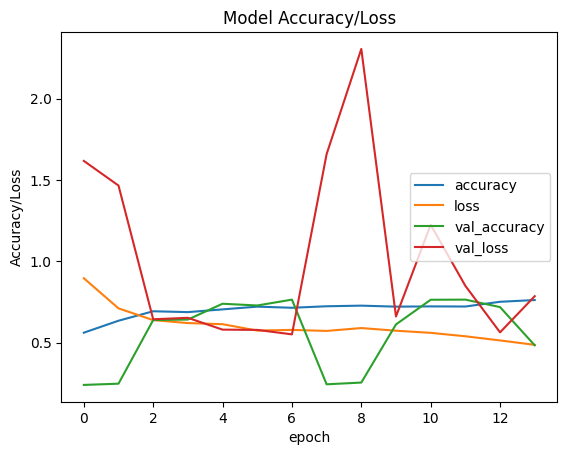

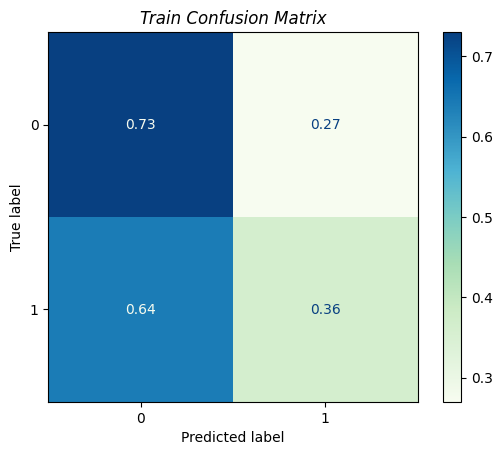

In [14]:
#Split işlemi
XSample_half, _, ySample_half, _ = train_test_split(XSample, ySample, test_size=0.4, random_state=0)
XTrain,XTest,yTrain,yTest = train_test_split(XSample_half,ySample_half,test_size=0.333,random_state=0)
XTrain,XVal,yTrain,yVal = train_test_split(XTrain,yTrain,test_size=0.5,random_state=0)
print(XTrain.shape)
print(XTest.shape)
print(XVal.shape)

model = models.Sequential()

#Giriş Katmanı
model.add(layers.Conv2D(256,(3,3), activation="relu", input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(32,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

#Dense: Özellikler soyutlaştırılır, bir nevi öğrenme buradadır.
model.add(layers.Dense(64, activation= "relu"))

#Verinin normalizasyonu: Daha hızlı ve daha stabil öğrenme
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation= "relu"))
model.add(layers.BatchNormalization())

#Öğrenme sürecinde random hücre kapatarak overfitting'i engeller
model.add(layers.Dropout(0.2))

#Çıkış Katmanı
model.add(layers.Dense(2, activation="softmax"))

#Model Özeti
model.summary()

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
history = model.fit(XTrain, yTrain, epochs=14, validation_data=(XVal,yVal))

#Visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss','val_accuracy','val_loss'], loc='center right')


#Sıcaklık Haritası
yTestPred = model.predict(XTest)
yTestPred = np.argmax(yTestPred, axis=1)
yTest = np.asarray(yTest)
print(classification_report(yTest, yTestPred))
cm = confusion_matrix(yTest, yTestPred, normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format='g')
plt.title(f"Train Confusion Matrix", style='italic')
plt.show()

Gözlemlerim:
* Herhangi bir kişisel bilgisayar için bu işlemler mümkün değil!!!
* Datasetin büyük ve kapsamlı olması çok önemli!
* İnternetteki benzeri projelerde sıklıkla pytorch kullanılıyor.
-Pytorch kerasın daha küçük veri setleri için kullanılabilen bir versiyonu denebilir.
*.Compose şeklinde bir yapı var, bu yapıyı kullanarak görselleri farklı versiyonlarda çoklayabiliyoruz. Kendi datasetimizi oluştururken kullanılabilir.